In [105]:
# IMPORTS

import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [77]:
# Read Data

df = pd.read_csv('rolling_stones_spotify.csv')

df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [78]:
# STEP 1.a :

df.isnull().sum()

,0
Unnamed: 0,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0


INFERENCE

There are no missing entries.

In [79]:
# Duplicates

df.duplicated().sum()

0

INFERENCE

There are no duplicate entries

In [80]:
# Removing Unnamed Column

df = df.drop('Unnamed: 0',axis = 1)

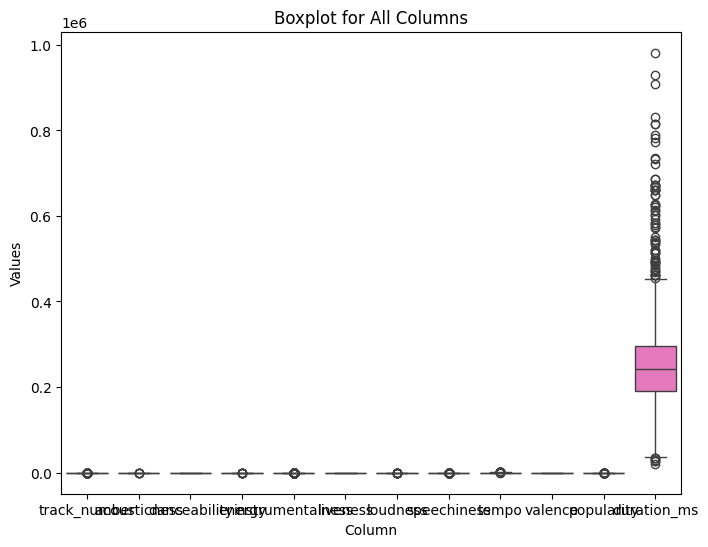

In [81]:
# Plot boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)

plt.title('Boxplot for All Columns')
plt.xlabel('Column')
plt.ylabel('Values')
plt.show()

<Axes: xlabel='duration_ms'>

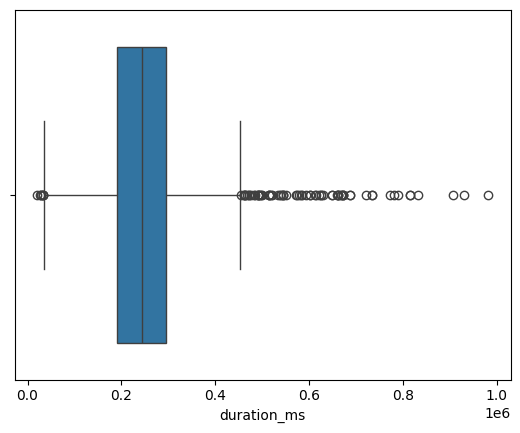

In [82]:
# Outliers

sns.boxplot(df, x ='duration_ms')

INFERENCE

There are a lot of outliers in the duration column. Lets fix it using winsorization.

In [83]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration_ms'].quantile(0.25)
Q3 = df['duration_ms'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['duration_ms'] < lower_bound) | (df['duration_ms'] > upper_bound)]

print("Outliers detected:")
print(outliers)

Outliers detected:
                                                   name  \
8                               Midnight Rambler - Live   
15                    Can't You Hear Me Knocking - Live   
45      Worried About You - Live At The El Mocambo 1977   
72    Just My Imagination (Running Away With Me) - L...   
80    You Can't Always Get What You Want - Live at W...   
...                                                 ...   
1291  Sing This All Together (See What Happens) - Re...   
1301   Sing This All Together (See What Happens) - Mono   
1413                                         Going Home   
1419                                         Going Home   
1433                                         Going Home   

                                                  album release_date  \
8                                    Licked Live In NYC   2022-06-10   
15                                   Licked Live In NYC   2022-06-10   
45                               Live At The El Mocambo 

In [84]:
# Winsorization

# Capping the outliers
df['duration_ms'] = df['duration_ms'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

print("DataFrame after capping outliers:")
print(df)

DataFrame after capping outliers:
                             name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoR

<Axes: xlabel='tempo'>

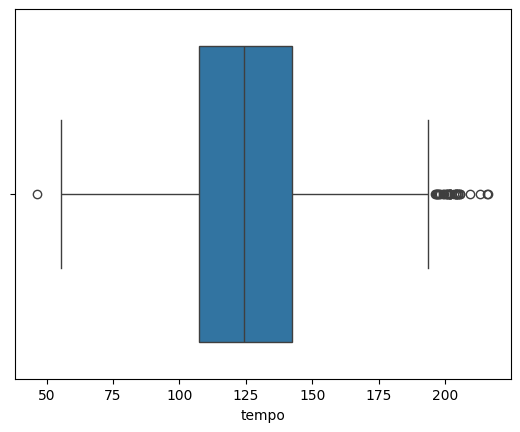

In [85]:
# TEMPO
sns.boxplot(df, x ='tempo')

INFERENCE

The one outlier at 46 is skewing the entire distribution to the left. Lets get rid of it.

<Axes: xlabel='tempo'>

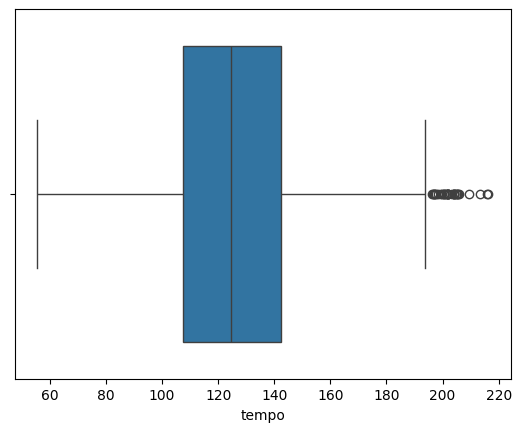

In [86]:
# Get rid of outlier

df = df[df['tempo'] > 47]

sns.boxplot(df, x ='tempo')


<Axes: xlabel='popularity'>

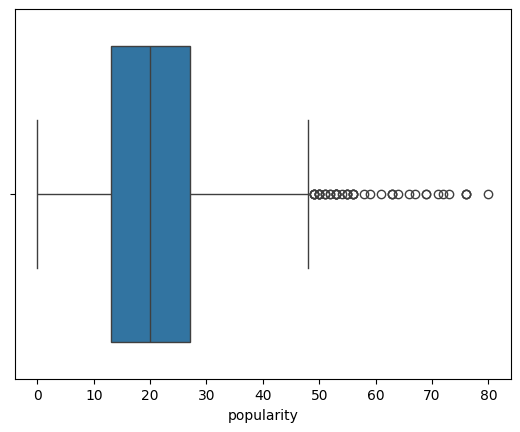

In [87]:
sns.boxplot(df, x ='popularity')

INFERENCE

Not a lot of outliers and since everything is in a scale it shouldn't matter too much.

In [88]:
# Drop Track Number

df = df.drop('track_number',axis = 1)

INFERENCE

We dropped track number as it has no real effect on recommendations or song similarities.

In [89]:
# SCALING

scaler = MinMaxScaler()
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Scale only numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Scaled DataFrame with only numeric columns:")
print(df)

Scaled DataFrame with only numeric columns:
                             name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

                          id                                   uri  \
0     2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2

In [90]:
# STEP 3.a : Popular Songs

# Calculate the average popularity rating
average_popularity = df['popularity'].mean()

print(f"The average popularity rating is: {average_popularity}")

# Filter songs with popularity ratings above the average
above_average_songs = df[df['popularity'] > average_popularity]

# Count the number of above-average popularity songs per album
above_average_song_counts = above_average_songs.groupby('album').size().reset_index(name='Above Average Song Count')

# Sort the albums by the number of above-average popularity songs in descending order
sorted_above_average_albums = above_average_song_counts.sort_values(by='Above Average Song Count', ascending=False)

print("Albums with the highest number of songs with more than average popularity ratings:")
print(sorted_above_average_albums)

The average popularity rating is: 0.25988191423244256
Albums with the highest number of songs with more than average popularity ratings:
                                    album  Above Average Song Count
34                          Honk (Deluxe)                        34
25  Exile On Main Street (Deluxe Version)                        28
31               Goats Head Soup (Deluxe)                        24
43                 Live At The El Mocambo                        23
41                     Licked Live In NYC                        23
..                                    ...                       ...
70    Totally Stripped - Amsterdam (Live)                         1
5                         Beggars Banquet                         1
49         Out Of Our Heads (US Sequence)                         1
17  December's Children (and everybody's)                         1
75               got LIVE if you want it!                         1

[76 rows x 2 columns]


<ipython-input-91-c0c4151c67e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


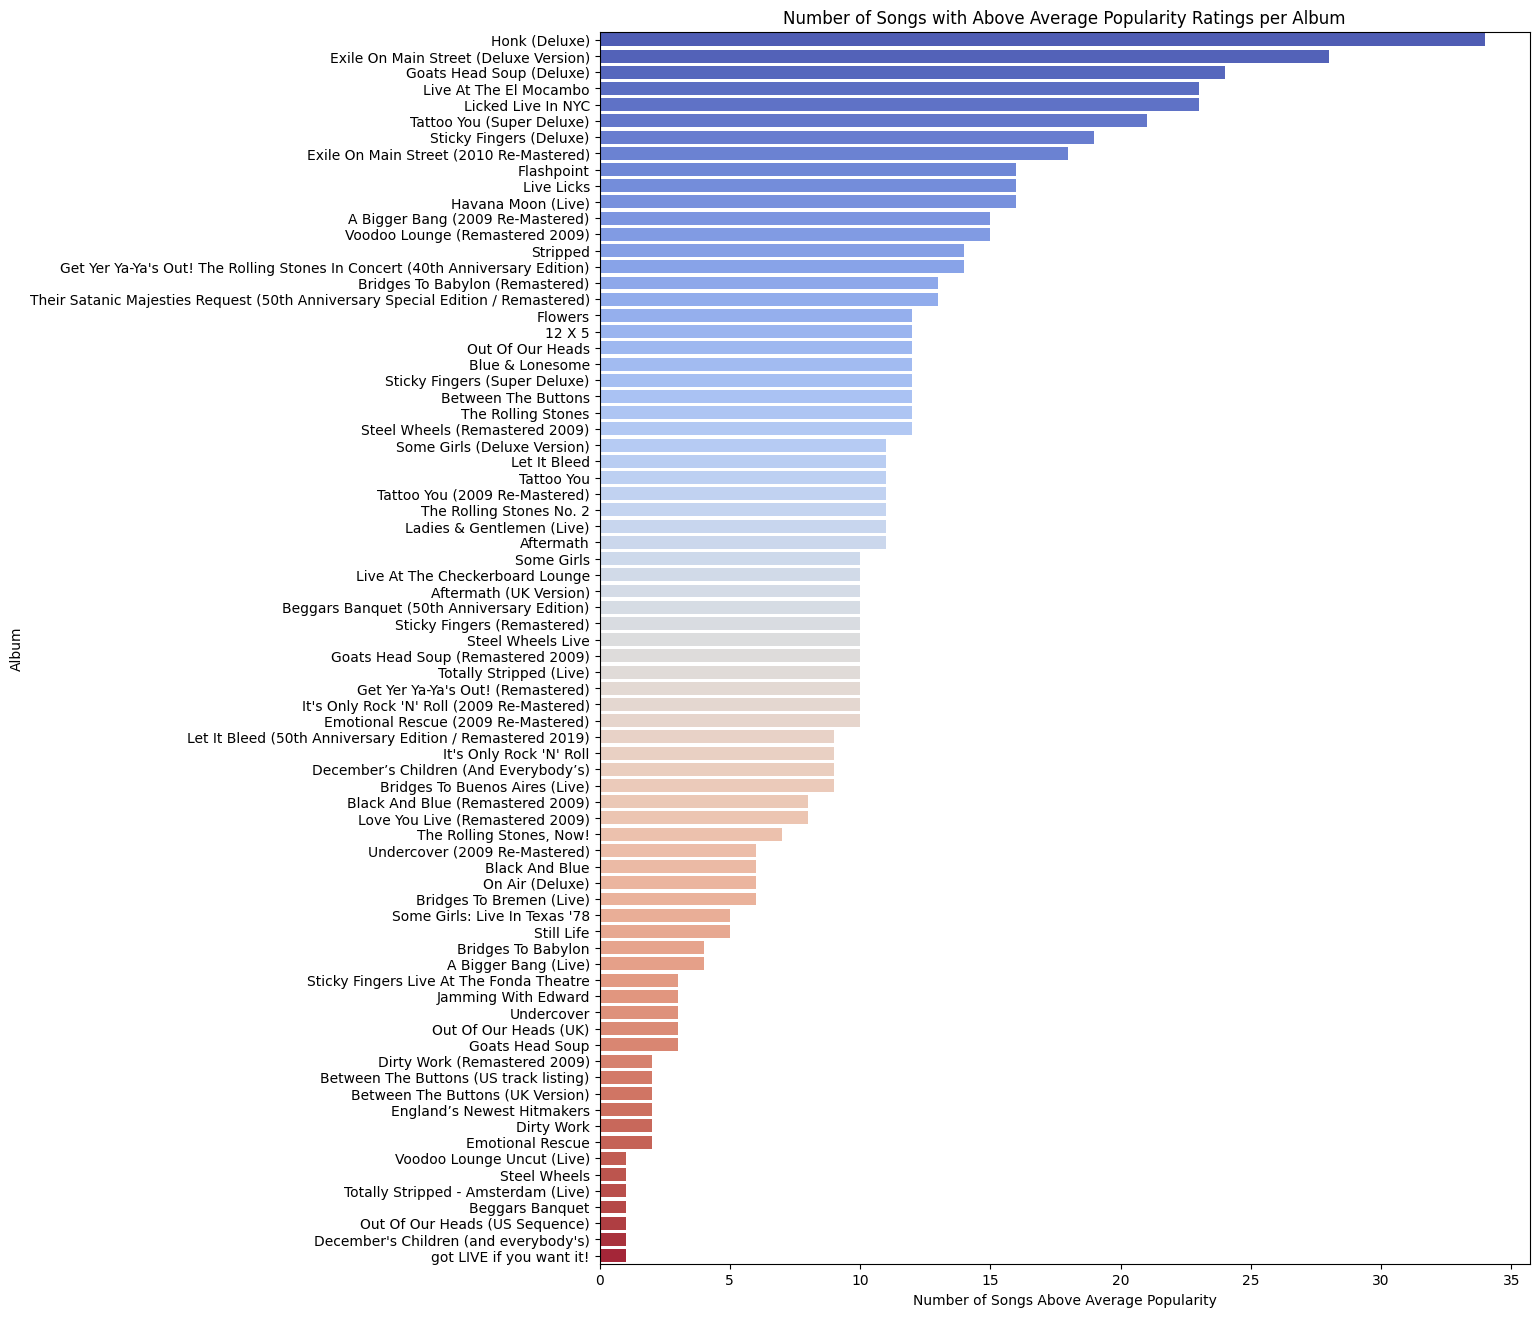

In [91]:
# VISUALIZATION

# Set the figure size for better readability
plt.figure(figsize=(12, 16))

# Create a bar plot
sns.barplot(
    x='Above Average Song Count',
    y='album',
    data=sorted_above_average_albums,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Number of Songs with Above Average Popularity Ratings per Album')
plt.xlabel('Number of Songs Above Average Popularity')
plt.ylabel('Album')

# Display the plot
plt.show()

INFERENCE

The two albums with highest number of popular songs are : Honk (Deluxe) and Exile on Main Street (Deluxe Version). These two albums should be recommended to everyone.

In [92]:
# STEP 3.c : Correlation with Popularity

# Calculate correlations with popularity
correlation_matrix = df[['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                         'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr()

# Display the correlation with popularity
popularity_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print("Correlation of popularity with various factors:")
print(popularity_correlations)

Correlation of popularity with various factors:
popularity          1.000000
loudness            0.156147
danceability        0.141005
acousticness        0.108055
valence             0.064992
instrumentalness   -0.010264
energy             -0.057106
tempo              -0.061721
speechiness        -0.136686
liveness           -0.205721
Name: popularity, dtype: float64


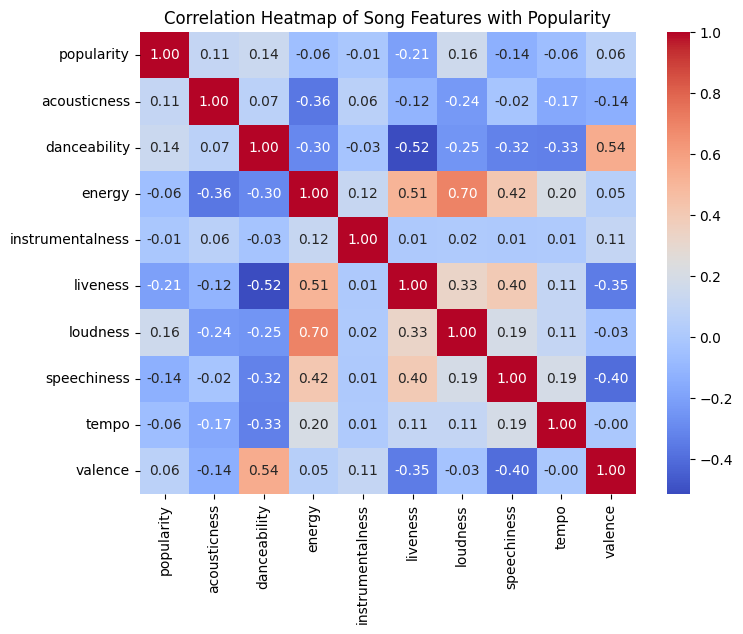

In [93]:
# Visualize Correlation

# Plot the heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Song Features with Popularity')
plt.show()

INFERENCE

It is interesting to note that popularity is directly correlated to loudness. This has led rise to a phenomena called the 'loudness war'. Scientifically speaking, if given a choice between two similar songs, an average untrained listener is likely to pick the louder one out of the two as the brain tends to interpret the loudness as being "better'. The loudness in this case refers to the overall dynamic range and not necesarily peak values. This phenomena is responsible for average loudness of music getting louder and louder over the years. This is also why commercials on TVs tend to be louder than the material.

In [94]:
# Evolution of Popularity through the years

# Convert release_date to datetime if not already
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['year'] = df['release_date'].dt.year

# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations for each year using only numeric columns
evolution_correlations = df.groupby('year')[numeric_cols].apply(lambda x: x.corr()['popularity']).reset_index()

print(evolution_correlations)

popularity  year  acousticness  danceability    energy  instrumentalness  \
0           1964      0.053334     -0.067692  0.061380         -0.038544   
1           1965      0.051618      0.007947 -0.030268         -0.048138   
2           1966      0.153383      0.350678 -0.289574         -0.079026   
3           1967      0.120534     -0.138009  0.031548          0.009551   
4           1968      0.031365      0.272056  0.201234         -0.043960   
5           1969      0.070277     -0.046429  0.047670          0.004819   
6           1970     -0.101273      0.140591  0.131483          0.182887   
7           1971      0.247183      0.364443 -0.241667         -0.026872   
8           1972      0.146763      0.195521  0.035712          0.081199   
9           1973      0.114960     -0.067798  0.145017         -0.317638   
10          1974      0.032813      0.431543  0.459231         -0.265426   
11          1976      0.238884     -0.163803  0.073779         -0.170237   
12          

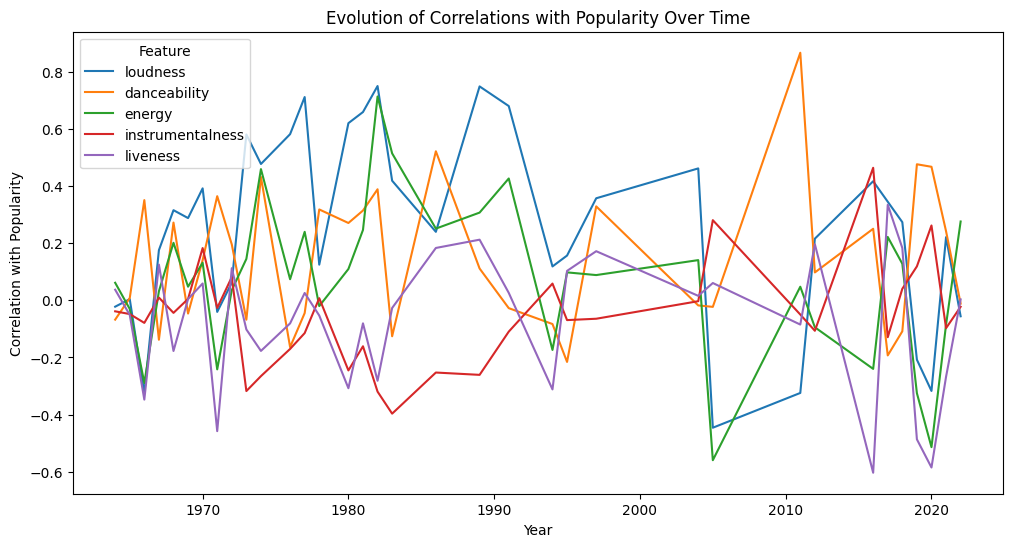

In [95]:
# Plot the evolution of correlations over time for selected features
plt.figure(figsize=(12, 6))

# Choose a subset of features to plot
features_to_plot = ['loudness', 'danceability', 'energy', 'instrumentalness', 'liveness']

for feature in features_to_plot:
    # Plot each feature's correlation with popularity over the years
    plt.plot(evolution_correlations['year'], evolution_correlations[feature], label=feature)

plt.title('Evolution of Correlations with Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation with Popularity')
plt.legend(title='Feature')
plt.show()

INFERENCE

It is interesting to note that up until 2010s, loudness dominated as the main factor responsible for song popularity. But it started declining since then. The reason for this is up until 2010, the audio processing quality kept on increasing, which meant cleaner recordings and mixing processes, which in turn meant that you could push the sound louder and louder without distortion. I think in 2000s, we peaked out on the scale of loudness, and once everyone understood how the loudness war was killing the subtle dynamics in the music, people started reverting back to the old days.

On the other hand, you can see that danceability dominated the popularity factor starting mid 2000s. Thats because of the rise of Electronic Dance Music which became extremely popular since that time, and even not electronic music artists started focusing on the danceability in order to compete with EDM music producers who where gaining popularity.

In [101]:
# STEP 3.d : Dimensionality Reduction

numeric_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

df_scaled = df[numeric_features]  # Use the already scaled data

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['popularity'] = df['popularity'].values

print(df_pca.head())

        PC1       PC2  popularity
0 -0.584764  0.532871      0.4125
1 -0.568372 -0.040135      0.4250
2 -0.554345  0.107275      0.4250
3 -0.550684 -0.324388      0.4000
4 -0.618161 -0.231226      0.4000


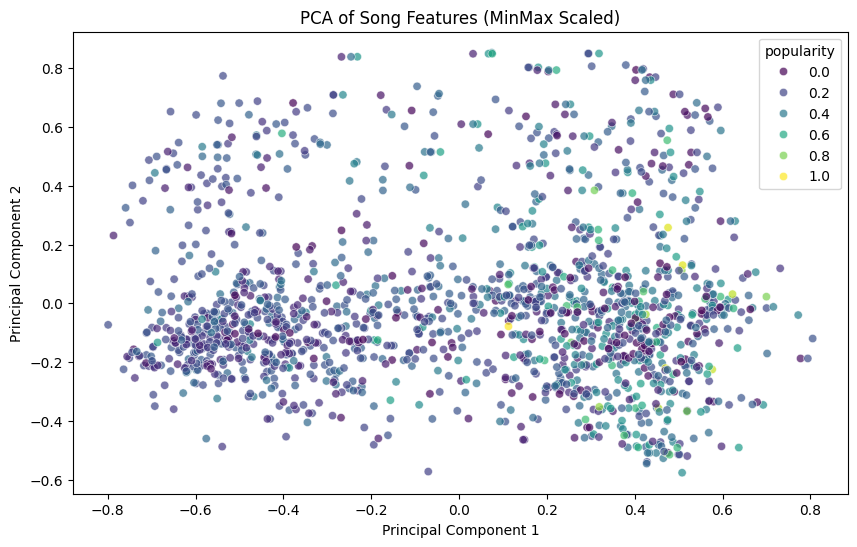

In [103]:
# Visualize PCA Results

# Scatter plot of PCA results colored by popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='popularity', data=df_pca, palette='viridis', alpha=0.7)

plt.title('PCA of Song Features (MinMax Scaled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [104]:
# Get the PCA components (loadings)
pca_loadings = pd.DataFrame(pca.components_, columns=numeric_features, index=['PC1', 'PC2'])

print("PCA Loadings:")
print(pca_loadings)

PCA Loadings:
     acousticness  danceability    energy  instrumentalness  liveness  \
PC1      0.120610      0.291614 -0.319964         -0.012139 -0.825748   
PC2     -0.188919      0.075843  0.285732          0.836849 -0.016726   

     loudness  speechiness     tempo   valence  popularity  
PC1 -0.138239    -0.103431 -0.096061  0.264782    0.082980  
PC2  0.094968    -0.014164  0.068969  0.402917    0.000511  


INFERENCE

PC1 : Danceablity has the highest positive influence on the component, while energy and liveness have the most negative influence on the component. So we can explain PC1 as a dimension that contrasts songs with high danceability against songs with high liveness and energy.

PC2 : Instrumentalness and valence have the highest positive influence on PC2, which means songs with high instrumentalness and valence will cause an increase in the PC2 score.

In [106]:
# STEP 4 : Clustering

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['popularity'] = df['popularity'].values  # Ensure to keep the popularity column for reference

# Prepare data for clustering
X = df_pca[['PC1', 'PC2']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

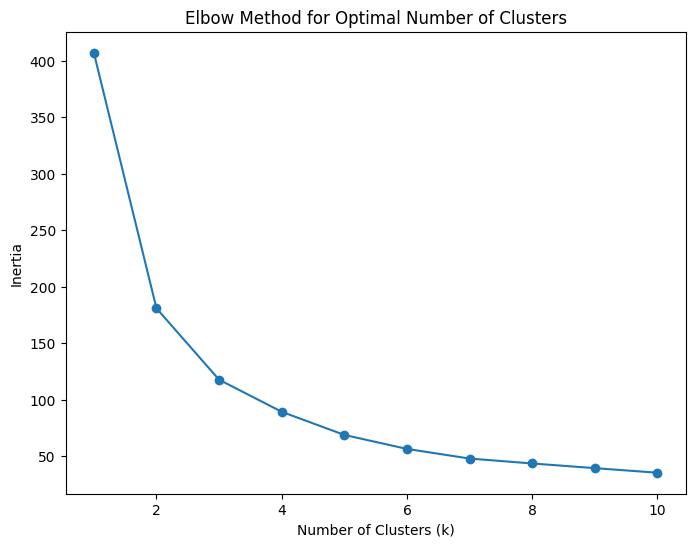

In [107]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Test for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

INFERENCE

Looks like optimal number of clusters is 3 or 4.

In [108]:
# Apply K-means clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(X)

print(df_pca.head())

        PC1       PC2  popularity  Cluster
0 -0.584764  0.532871      0.4125        2
1 -0.568372 -0.040135      0.4250        2
2 -0.554345  0.107275      0.4250        2
3 -0.550684 -0.324388      0.4000        2
4 -0.618161 -0.231226      0.4000        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


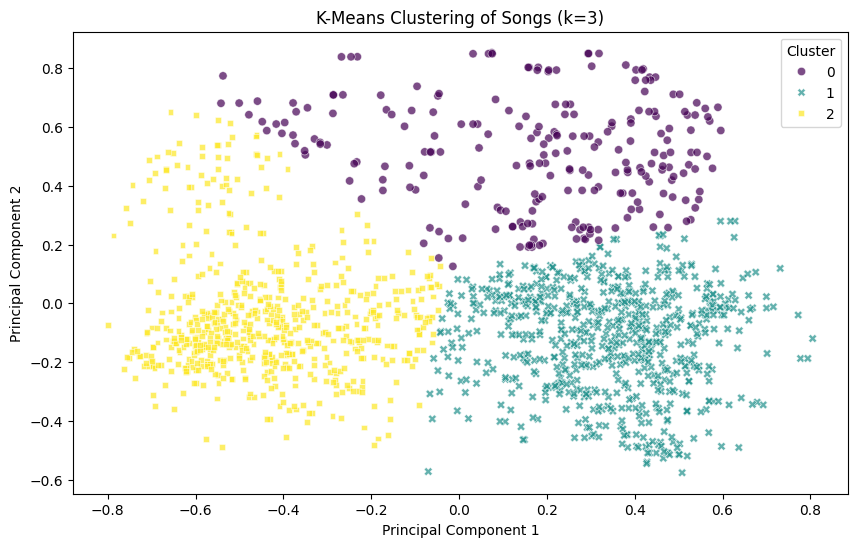

In [109]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', alpha=0.7, style='Cluster')

plt.title(f'K-Means Clustering of Songs (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [111]:
# Merge the cluster labels back to the original DataFrame
df['Cluster'] = df_pca['Cluster']

# Select only numeric columns for calculating means
numeric_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Calculate the mean values of numeric features for each cluster
cluster_means = df.groupby('Cluster')[numeric_features].mean()

print("Cluster Means:")
print(cluster_means)

Cluster Means:
         acousticness  danceability    energy  instrumentalness  liveness  \
Cluster                                                                     
0.0          0.283446      0.525900  0.722216          0.302729  0.327535   
1.0          0.271159      0.533899  0.674301          0.146497  0.246973   
2.0          0.219035      0.368828  0.866245          0.134462  0.797521   

         loudness  speechiness     tempo   valence  popularity  
Cluster                                                         
0.0      0.740012     0.048881  0.408958  0.705595    0.308739  
1.0      0.709598     0.050139  0.430261  0.652105    0.279553  
2.0      0.787504     0.117294  0.459516  0.498393    0.220019  


INFERENCE :

Cluster 0 : These songs are upbeat, have postive mood and also are very danceable. They have a fair mix of acoustic and instrumental elements, which is why they might be moderately popular.

Cluster 1 : This cluster is slightly similar to cluster 0. However, the energy and danceabilty is not as high, and the tempo also tends to be slightly faster. It is also not as cheerful as cluster 0. These songs are also more rhythm oriented and less instrumental.

Cluster 2 : This cluster has the most energetic songs which heavily feature live recordings. The songs are also the least popular, suggesting that it might cater to more niche audiences.